# Movies DTG prediction

## Web scraping movies data

In [1]:
# if needed: pip install requests or conda install requests
import requests

requests.__path__

['/Users/srinivasaluri/anaconda/lib/python3.6/site-packages/requests']

In [2]:
from collections import defaultdict
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import re
import pickle as pkl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
list_url = ["https://www.boxofficemojo.com/year/1999/",
           "https://www.boxofficemojo.com/year/2000/",
           "https://www.boxofficemojo.com/year/2001/",
           "https://www.boxofficemojo.com/year/2002/",
           "https://www.boxofficemojo.com/year/2003/",
           "https://www.boxofficemojo.com/year/2004/",
           "https://www.boxofficemojo.com/year/2005/",
           "https://www.boxofficemojo.com/year/2006/",
           "https://www.boxofficemojo.com/year/2007/",
           "https://www.boxofficemojo.com/year/2008/",
           "https://www.boxofficemojo.com/year/2009/",
           "https://www.boxofficemojo.com/year/2010/",
           "https://www.boxofficemojo.com/year/2011/",
           "https://www.boxofficemojo.com/year/2012/",
           "https://www.boxofficemojo.com/year/2013/",
           "https://www.boxofficemojo.com/year/2014/",
           "https://www.boxofficemojo.com/year/2015/",
           "https://www.boxofficemojo.com/year/2016/",
           "https://www.boxofficemojo.com/year/2017/",
           "https://www.boxofficemojo.com/year/2018/",
           "https://www.boxofficemojo.com/year/2019/"]


In [44]:
#webscraping movie urls from the year wise webpages
links = []
for url in list_url:
    try:
        response = requests.get(url)
        page = response.text
        soup = BeautifulSoup(page, "lxml")
        table = soup.find_all("table")
        rows = table[0].find_all("tr")[1:]

        for i in rows:
            partial = i.find("a")["href"]
            full =  "https://www.boxofficemojo.com" + partial
            links.append(full)

    except:
        pass

len(links)

12905

In [46]:
#pickled all linke into a file
import pickle
with open('movie_links.pickle', 'wb') as file:
    pickle.dump(links, file)

In [100]:
#Read pickled file and extrct links to the page that has required field
import pickle
with open('movie_links.pickle','rb') as read_file:
    movie_links1 = pickle.load(read_file)

In [102]:
#Web scraping urls from the movie_links1 to scrape all data 
links2 = []
for link in movie_links1:
    try:
        response = requests.get(link)
        page = response.text
        soup = BeautifulSoup(page, "lxml")
        partial_link = soup.find('a', 
                  {'class': "a-link-normal mojo-title-link refiner-display-highlight"})["href"]
        full_link = "https://www.boxofficemojo.com" + partial_link
        links2.append(full_link)
    except:
        pass
len(links2)

12873

In [103]:
#pickled all links2 into a file
import pickle
with open('movie_links2.pickle', 'wb') as file:
    pickle.dump(links2, file)

In [226]:
print(soup.find("title").text)
print(soup.find("h2").findNext().text.split()[-1])
print(get_movie_value(soup, "Running Time"))
print(get_movie_value(soup, "Release Date"))
print(get_movie_value(soup, "Distributor"))
print(get_movie_value(soup, "Budget"))
print(get_movie_value(soup, "MPAA"))
print(get_movie_value(soup, "Domestic Opening"))
print(get_movie_value(soup, "Genres"))

Bowfinger - Box Office Mojo
$66,384,775
1 hr 37 min
August 13, 1999
            (Domestic)
Universal PicturesSee full company information


$55,000,000
PG-13
$18,062,550
Comedy


In [18]:
import dateutil.parser

def money_to_int(moneystring):
    moneystring = moneystring.replace('$', '').replace(',', '')
    
    return int(moneystring)

def runtime_to_minutes(runtimestring):
    runtime = runtimestring.split()
    try:
        minutes = int(runtime[0])*60 + int(runtime[2])
        return minutes
    except:
        return None

def to_date(datestring):
    date = dateutil.parser.parse(datestring)
    return date

def Bud_to_int(budgetstring):
    b = (budgetstring.replace('$', '').split(' ')[0])
    b = b.replace(',', '')
    b = b.replace('N/A', '0')
    if b:
        return int(float(b)*1000000)
    else:
        return None

### web scraping all into a list

In [9]:
def get_movie_value(soup, field_name):
    
    '''Grab a value from boxofficemojo HTML
    
    Takes a string attribute of a movie on the page and returns the string in
    the next sibling object (the value for that attribute) or None if nothing is found.
    '''
    
    obj = soup.find(text=re.compile(field_name))
    
    if not obj: 
        return None
    
    # this works for most of the values
    next_sibling = obj.findNext()
    
    if next_sibling:
        return next_sibling.text 
    else:
        return None

In [270]:
Title = []
Runtime = []
ReleaseDate = []
Budget = []
DTG = []
Rating = []
Genre = []
Distributor = []
DomesticOpening = []

for link in links2:
    try:
        response = requests.get(link)
        page = response.text
        soup = BeautifulSoup(page, "lxml")
    
        title = soup.find("title").text
        budget = get_movie_value(soup,"Budget")
        dtg = soup.find("h2").findNext().text.split()[-1]
        runtime = get_movie_value(soup, "Running Time")
        release_date = get_movie_value(soup, "Release Date")
        rating = get_movie_value(soup, "MPAA")
        genre = get_movie_value(soup, "Genres")
        dist = get_movie_value(soup, "Distributor")
        opening = get_movie_value(soup, "Domestic Opening")
        
        Title.append(title)
        Budget.append(budget)
        DTG.append(dtg)
        Runtime.append(runtime)
        ReleaseDate.append(release_date)
        Rating.append(rating)
        Genre.append(genre)
        Distributor.append(dist)
        DomesticOpening.append(opening)
    except:
        pass
    

In [371]:
Movies = {"Title": Title,
          "Runtime" : Runtime,
          "ReleaseDate" : ReleaseDate,
          "Budget" : Budget,
          "DTG": DTG,
          "Rating": Rating,
          "Genre": Genre,
          "Distributor": Distributor,
          "DomesticOpening": DomesticOpening}


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [370]:
print(len(Title),
     len(Distributor),
     len(Runtime),
     len(ReleaseDate),
     len(Genre),
     len(Rating),
     len(DTG),
     len(Budget))

12872 12872 12872 12872 12872 12872 12872 12872


In [452]:
df = pd.DataFrame(Movies)

In [453]:
df.head()

,Title,Runtime,ReleaseDate,Budget,DTG,Rating,Genre,Distributor,DomesticOpening
0,Star Wars: Episode I - The Phantom Menace - Bo...,2 hr 16 min,"May 19, 1999\n (Domestic)","$115,000,000","$474,544,677",PG,Action\n \n Adventure\n \n ...,Twentieth Century FoxSee full company informat...,"$64,820,970"
1,The Sixth Sense - Box Office Mojo,1 hr 47 min,"August 6, 1999\n (Domestic)","$40,000,000","$293,506,292",PG-13,Drama\n \n Mystery\n \n Th...,Walt Disney Studios Motion PicturesSee full co...,"$26,681,262"
2,Toy Story 2 - Box Office Mojo,1 hr 32 min,"November 19, 1999\n (Domestic)","$90,000,000","$245,852,179",None,Adventure\n \n Animation\n \n ...,Walt Disney Studios Motion PicturesSee full co...,"$300,163"
3,The Matrix - Box Office Mojo,2 hr 16 min,"March 31, 1999\n (Domestic)","$63,000,000","$171,479,930",R,Action\n \n Sci-Fi,Warner Bros.See full company information\n\n,"$27,788,331"
4,Big Daddy - Box Office Mojo,1 hr 33 min,"June 25, 1999\n (Domestic)","$34,200,000","$163,479,795",PG-13,Comedy\n \n Drama,Sony Pictures ReleasingSee full company inform...,"$41,536,370"


In [469]:
df.shape
df.to_csv("Movies_041219.csv")

## Clean Movies data

extracting Domestic gross for one movie(worked)

In [376]:
df.dtypes

Title              object
Runtime            object
ReleaseDate        object
Budget             object
DTG                object
Rating             object
Genre              object
Distributor        object
DomesticOpening    object
dtype: object

In [474]:
#clean title
df["Title"] = df["Title"].str.replace(" - Box Office Mojo", "")    

In [478]:
#clean Runtime
def runtime_to_minutes(runtimestring):
    try:
        runtime = runtimestring.split()
        minutes = int(runtime[0])*60 + int(runtime[2])
        return minutes
    except:
        return None
    

df["Runtime"] = df["Runtime"].apply(runtime_to_minutes)

In [481]:
#clean Budget
def money_to_int(moneystring):
    try:
        moneystring = moneystring.replace('$', '').replace(',', '')
        return int(moneystring)
    except:
        None
   
    

df["Budget"] = df["Budget"].apply(money_to_int)

In [482]:
#clean Domastic Total
df["DTG"] = df["DTG"].apply(money_to_int)

In [483]:
#clean Distributor
df["Distributor"] = df["Distributor"].str.replace("See full company information\n\n", "")

In [486]:
#clean Release date
import dateutil.parser
def to_date(datestring):
    date = datestring.split("\n")[0]
    date = dateutil.parser.parse(date)
    return date
df["ReleaseDate"] = df["ReleaseDate"].apply(to_date)

In [491]:
#clean Domestic opening
df["DomesticOpening"] = df["DomesticOpening"].apply(money_to_int)

In [489]:
#clean Genre
def to_Genre(genstring):
    try:
        genre = genstring.replace("\n    \n        ", " ")
        return genre
    except:
        None
df["Genre"] = df["Genre"].apply(to_Genre)   

In [505]:
df["Genre"].apply(lambda x: x.split(" ")[0])

AttributeError: 'NoneType' object has no attribute 'split'

In [492]:
df.head()

,Title,Runtime,ReleaseDate,Budget,DTG,Rating,Genre,Distributor,DomesticOpening
0,Star Wars: Episode I - The Phantom Menace,136.0,1999-05-19,115000000.0,474544677,PG,Action Adventure Fantasy Sci-Fi,Twentieth Century Fox,64820970.0
1,The Sixth Sense,107.0,1999-08-06,40000000.0,293506292,PG-13,Drama Mystery Thriller,Walt Disney Studios Motion Pictures,26681262.0
2,Toy Story 2,92.0,1999-11-19,90000000.0,245852179,None,Adventure Animation Comedy Family Fantasy,Walt Disney Studios Motion Pictures,300163.0
3,The Matrix,136.0,1999-03-31,63000000.0,171479930,R,Action Sci-Fi,Warner Bros.,27788331.0
4,Big Daddy,93.0,1999-06-25,34200000.0,163479795,PG-13,Comedy Drama,Sony Pictures Releasing,41536370.0


In [499]:
print(df["Genre"].value_counts())
print(df["Rating"].value_counts())

Drama                                          1166
Documentary                                    1043
Comedy Drama                                    556
Comedy Drama Romance                            519
Drama Romance                                   506
                                               ... 
Adventure Comedy Family Music Romance             1
Comedy Family Romance Sci-Fi                      1
Biography Crime Documentary History Mystery       1
Biography Drama Fantasy Romance                   1
Action Drama History Mystery                      1
Name: Genre, Length: 1344, dtype: int64
R            3819
PG-13        2564
PG           1155
G             126
Not Rated      29
NC-17          15
Unrated         4
M/PG            2
Name: Rating, dtype: int64


## Get Movie budget from the-numbers.com 


In [470]:
#Budget webscraped from numbers.com and saves as csv file
df_budget = pd.read_csv("movie_bdget_1999.csv")

In [506]:
Bud_copy = df_budget.copy()

In [549]:
df_budget['Budget']=pd.to_numeric(df_budget.Budget.str.replace('\D',''))
df_full = pd.merge(df2_copy,df_budget[['Title','Budget']],on='Title',how='left')
df_full["Budget"] = np.where(df_full.Budget_y.isnull(),df_full.Budget_x, df_full.Budget_y)

In [576]:
df_full.head()

,Title,Runtime,ReleaseDate,Budget_x,DTG,Rating,Genre,Distributor,DomesticOpening,Budget_y,Budget
0,Star Wars: Episode I - The Phantom Menace,136.0,1999-05-19,115000000.0,474544677,PG,Action Adventure Fantasy Sci-Fi,Twentieth Century Fox,64820970.0,NaN,115000000.0
1,The Sixth Sense,107.0,1999-08-06,40000000.0,293506292,PG-13,Drama Mystery Thriller,Walt Disney Studios Motion Pictures,26681262.0,40000000.0,40000000.0
2,Toy Story 2,92.0,1999-11-19,90000000.0,245852179,None,Adventure Animation Comedy Family Fantasy,Walt Disney Studios Motion Pictures,300163.0,90000000.0,90000000.0
3,The Matrix,136.0,1999-03-31,63000000.0,171479930,R,Action Sci-Fi,Warner Bros.,27788331.0,65000000.0,65000000.0
4,Big Daddy,93.0,1999-06-25,34200000.0,163479795,PG-13,Comedy Drama,Sony Pictures Releasing,41536370.0,30000000.0,30000000.0


In [560]:
df3 = df_full[df_full.Budget>1000000]# df3 with full budget values
df3 = df3.drop(["Budget_x", "Budget_y"], axis = 1)

In [564]:
df3.shape

(4484, 9)

In [565]:
#Save to csv file for future use
df3.to_csv("Movies_final_with_budget_061219.csv")

In [573]:
#drop NA values
df3 = df3.dropna()

In [582]:
# df3 index is random, reset index
df3 = df3.reset_index()
df3 = df3.drop("index", axis = 1)

In [584]:
df3 #final dataframe to work with

,Title,Runtime,ReleaseDate,DTG,Rating,Genre,Distributor,DomesticOpening,Budget
0,Star Wars: Episode I - The Phantom Menace,136.0,1999-05-19,474544677,PG,Action Adventure Fantasy Sci-Fi,Twentieth Century Fox,64820970.0,115000000.0
1,The Sixth Sense,107.0,1999-08-06,293506292,PG-13,Drama Mystery Thriller,Walt Disney Studios Motion Pictures,26681262.0,40000000.0
2,The Matrix,136.0,1999-03-31,171479930,R,Action Sci-Fi,Warner Bros.,27788331.0,65000000.0
3,Big Daddy,93.0,1999-06-25,163479795,PG-13,Comedy Drama,Sony Pictures Releasing,41536370.0,30000000.0
4,The Mummy,124.0,1999-05-07,155385488,PG-13,Action Adventure Fantasy,Universal Pictures,43369635.0,195000000.0
5,The Mummy,124.0,1999-05-07,155385488,PG-13,Action Adventure Fantasy,Universal Pictures,43369635.0,80000000.0
6,Runaway Bride,116.0,1999-07-30,152257509,PG,Comedy Romance,Paramount Pictures,35055556.0,70000000.0
7,Notting Hill,124.0,1999-05-28,116089678,PG-13,Comedy Drama Romance,Universal Pictures,21811180.0,42000000.0
8,Wild Wild West,106.0,1999-06-30,113804681,PG-13,Action Comedy Sci-Fi Western,Warner Bros.,27687484.0,175000000.0
9,Double Jeopardy,105.0,1999-09-24,116741558,R,Crime Drama Mystery Thriller,Paramount Pictures,23162542.0,40000000.0


## Summary stats and EDA

In [510]:
Mov = pd.read_csv("Movies_final_with_budget_061219.csv")
Mov.head()

,Unnamed: 0,Title,Runtime,ReleaseDate,DTG,Rating,Genre,Distributor,DomesticOpening,Budget
0,0,Star Wars: Episode I - The Phantom Menace,136.0,1999-05-19,474544677,PG,Action Adventure Fantasy Sci-Fi,Twentieth Century Fox,64820970.0,115000000.0
1,1,The Sixth Sense,107.0,1999-08-06,293506292,PG-13,Drama Mystery Thriller,Walt Disney Studios Motion Pictures,26681262.0,40000000.0
2,2,Toy Story 2,92.0,1999-11-19,245852179,NaN,Adventure Animation Comedy Family Fantasy,Walt Disney Studios Motion Pictures,300163.0,90000000.0
3,3,The Matrix,136.0,1999-03-31,171479930,R,Action Sci-Fi,Warner Bros.,27788331.0,65000000.0
4,4,Big Daddy,93.0,1999-06-25,163479795,PG-13,Comedy Drama,Sony Pictures Releasing,41536370.0,30000000.0


In [511]:
df1 = Mov.drop('Unnamed: 0', axis = 1)
df1.sort_values("DTG", ascending = False)[:10]

,Title,Runtime,ReleaseDate,DTG,Rating,Genre,Distributor,DomesticOpening,Budget
3711,Star Wars: Episode VII - The Force Awakens,138.0,2015-12-16,936662225,PG-13,Action Adventure Sci-Fi,Walt Disney Studios Motion Pictures,247966675.0,245000000.0
3488,Star Wars: Episode VII - The Force Awakens,138.0,2015-12-16,936662225,PG-13,Action Adventure Sci-Fi,Walt Disney Studios Motion Pictures,247966675.0,245000000.0
4321,Avengers: Endgame,181.0,2019-04-24,858373000,PG-13,Action Adventure Drama Sci-Fi,Walt Disney Studios Motion Pictures,357115007.0,400000000.0
2079,Avatar,162.0,2009-12-16,760507625,PG-13,Action Adventure Fantasy Sci-Fi,Twentieth Century Fox,77025481.0,237000000.0
2432,Avatar,162.0,2009-12-16,760507625,PG-13,Action Adventure Fantasy Sci-Fi,Twentieth Century Fox,77025481.0,237000000.0
2297,Avatar,162.0,2009-12-16,760507625,PG-13,Action Adventure Fantasy Sci-Fi,Twentieth Century Fox,77025481.0,237000000.0
4123,Black Panther,134.0,2018-02-13,700059566,PG-13,Action Adventure Sci-Fi,Walt Disney Studios Motion Pictures,202003951.0,200000000.0
4124,Avengers: Infinity War,149.0,2018-04-25,678815482,PG-13,Action Adventure Sci-Fi,Walt Disney Studios Motion Pictures,257698183.0,300000000.0
2881,Titanic,194.0,1997-12-18,659363944,PG-13,Drama Romance,Paramount Pictures,28638131.0,200000000.0
4086,Titanic,194.0,1997-12-18,659363944,PG-13,Drama Romance,Paramount Pictures,28638131.0,200000000.0


In [512]:
# Remove duplicated rows
df2 = df1.drop_duplicates()

In [513]:
df2.duplicated(subset = ["Title"])

0       False
1       False
2       False
3       False
4       False
        ...  
4473     True
4474    False
4476     True
4479     True
4482     True
Length: 3526, dtype: bool

In [514]:
df2.shape

(3526, 9)

In [515]:
df2.isnull().sum()

Title                0
Runtime             55
ReleaseDate          0
DTG                  0
Rating             202
Genre                0
Distributor         33
DomesticOpening     67
Budget               0
dtype: int64

In [516]:
#drop missing values 
df3 = df2.dropna()
df3.shape

(3235, 9)

In [517]:
df3 = df3.drop_duplicates(subset= ["Title", "ReleaseDate"], keep = "first")

In [518]:
len(df3)

3211

In [519]:
# take genre 
def to_Genre(string):
    return string.split(" ")[0]
df3["Genre"] = df3["Genre"].apply(to_Genre)

In [520]:
# Make year and month seperate columns
df3["Month"] = pd.DatetimeIndex(df3["ReleaseDate"]).month
df3["Year"] = pd.DatetimeIndex(df3["ReleaseDate"]).year

In [521]:
df3.sort_values("DTG",ascending = False)

,Title,Runtime,ReleaseDate,DTG,Rating,Genre,Distributor,DomesticOpening,Budget,Month,Year
3488,Star Wars: Episode VII - The Force Awakens,138.0,2015-12-16,936662225,PG-13,Action,Walt Disney Studios Motion Pictures,247966675.0,245000000.0,12,2015
4321,Avengers: Endgame,181.0,2019-04-24,858373000,PG-13,Action,Walt Disney Studios Motion Pictures,357115007.0,400000000.0,4,2019
2079,Avatar,162.0,2009-12-16,760507625,PG-13,Action,Twentieth Century Fox,77025481.0,237000000.0,12,2009
4123,Black Panther,134.0,2018-02-13,700059566,PG-13,Action,Walt Disney Studios Motion Pictures,202003951.0,200000000.0,2,2018
4124,Avengers: Infinity War,149.0,2018-04-25,678815482,PG-13,Action,Walt Disney Studios Motion Pictures,257698183.0,300000000.0,4,2018
2881,Titanic,194.0,1997-12-18,659363944,PG-13,Drama,Paramount Pictures,28638131.0,200000000.0,12,1997
3487,Jurassic World,124.0,2015-06-10,652270625,PG-13,Action,Universal Pictures,208806270.0,215000000.0,6,2015
2829,The Avengers,143.0,2012-04-25,623357910,PG-13,Action,Walt Disney Studios Motion Pictures,207438708.0,225000000.0,4,2012
3922,Star Wars: Episode VIII - The Last Jedi,152.0,2017-12-13,620181382,PG-13,Action,Walt Disney Studios Motion Pictures,220009584.0,317000000.0,12,2017
4125,Incredibles 2,118.0,2018-06-14,608581744,PG,Action,Walt Disney Studios Motion Pictures,182687905.0,200000000.0,6,2018


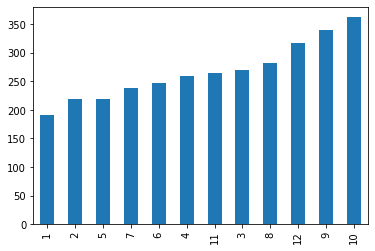

In [522]:
# Number of movies per month
df3.Month.value_counts(ascending = True).plot(kind = "bar")
#print("More movies in the month of December")

In [544]:
# Plot Month vs DTG
sem = df3.groupby("Month")["DTG"].sem().reset_index().sort_values("DTG", ascending = False)
sem

,Month,DTG
5,6,6.995237e+06
4,5,6.813341e+06
3,4,6.464916e+06
11,12,6.128544e+06
6,7,5.888357e+06
1,2,4.804552e+06
10,11,4.742402e+06
2,3,4.334838e+06
7,8,2.893285e+06
9,10,2.773817e+06


In [545]:
error = sem["DTG"]

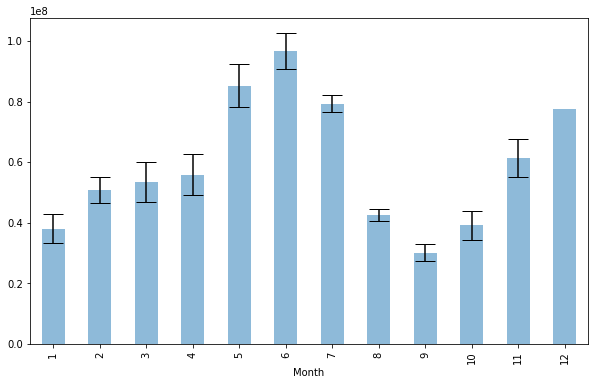

In [547]:
(df3.set_index("Month")
.groupby("Month")["DTG"]
.mean()
.plot.bar(yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10))

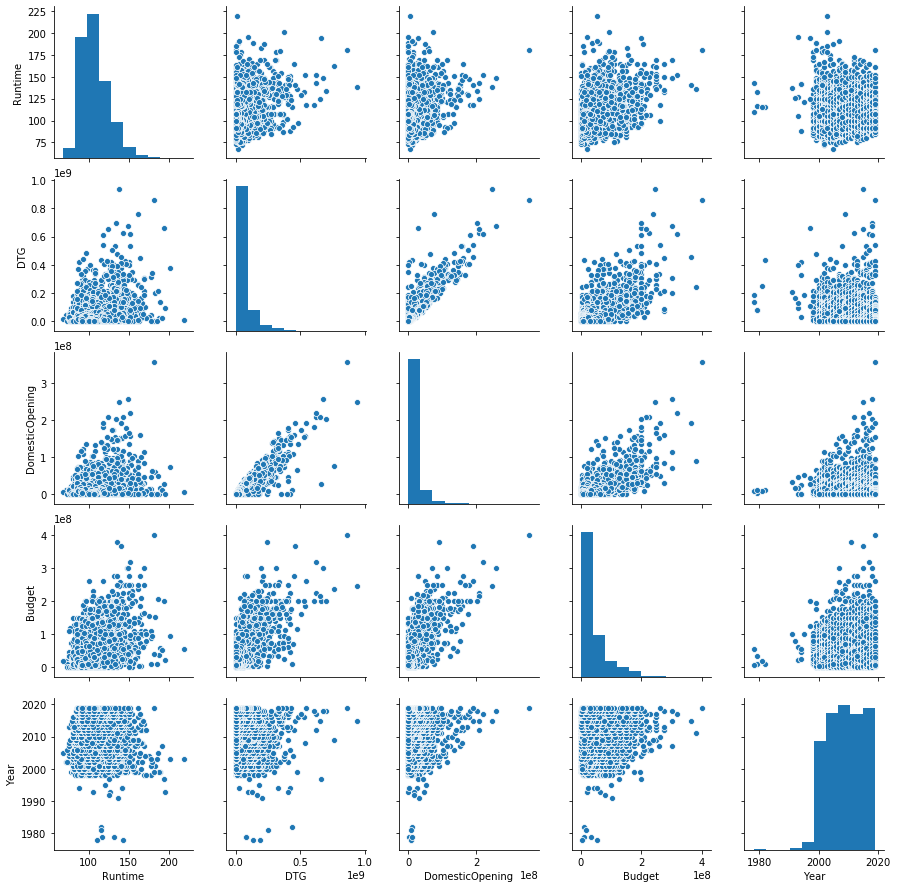

In [78]:
#pair plot to see any relationship between variables 
sns.pairplot(df3)

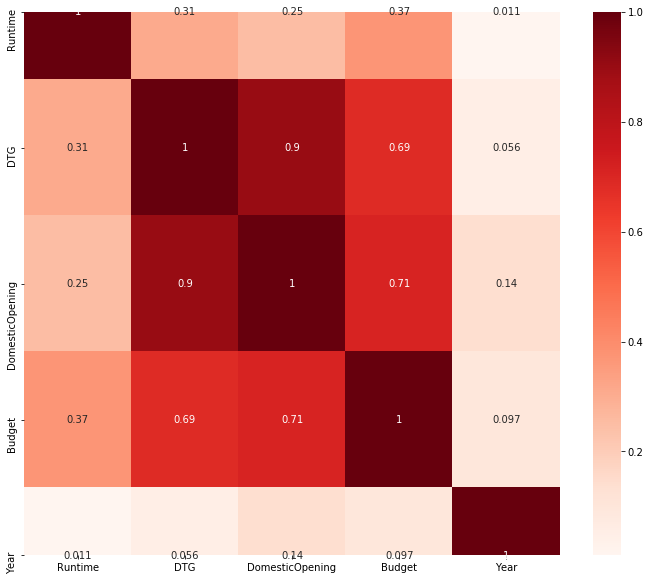

In [79]:
#Correlation map for the predictors
plt.figure(figsize=(12,10))
cor = df3.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [78]:
#Top 10 distributors
top10_distributors = (df3.groupby(["Distributor"])["DTG"].mean()
                      .reset_index()
                      .sort_values(["DTG"], ascending = False )).Distributor[:20]
top10_distributors

169    Walt Disney Studios Motion Pictures
36                              DreamWorks
163                     Universal Pictures
159                  Twentieth Century Fox
143                Sony Pictures Releasing
170                           Warner Bros.
37                 DreamWorks Distribution
108                     Paramount Pictures
93                         New Line Cinema
147                   Summit Entertainment
128                     Revolution Studios
157                       TriStar Pictures
162               United Artists Releasing
94                         Newmarket Films
76                               Lionsgate
133                      STX Entertainment
34                         Dimension Films
134                            Screen Gems
46                            FilmDistrict
82               Metro-Goldwyn-Mayer (MGM)
Name: Distributor, dtype: object

In [197]:
top10 = \
    df3[df3['Distributor'].isin(top10_distributors)]
top10[:10]

,Title,Runtime,ReleaseDate,DTG,Rating,Genre,Distributor,DomesticOpening,Budget,Month,Year
0,Star Wars: Episode I - The Phantom Menace,136.0,1999-05-19,474544677,PG,Action,Twentieth Century Fox,64820970.0,115000000.0,May,1999
1,The Sixth Sense,107.0,1999-08-06,293506292,PG-13,Drama,Walt Disney Studios Motion Pictures,26681262.0,40000000.0,August,1999
3,The Matrix,136.0,1999-03-31,171479930,R,Action,Warner Bros.,27788331.0,65000000.0,March,1999
4,Big Daddy,93.0,1999-06-25,163479795,PG-13,Comedy,Sony Pictures Releasing,41536370.0,30000000.0,June,1999
5,The Mummy,124.0,1999-05-07,155385488,PG-13,Action,Universal Pictures,43369635.0,195000000.0,May,1999
6,The Mummy,124.0,1999-05-07,155385488,PG-13,Action,Universal Pictures,43369635.0,80000000.0,May,1999
7,Runaway Bride,116.0,1999-07-30,152257509,PG,Comedy,Paramount Pictures,35055556.0,70000000.0,July,1999
8,Notting Hill,124.0,1999-05-28,116089678,PG-13,Comedy,Universal Pictures,21811180.0,42000000.0,May,1999
9,Wild Wild West,106.0,1999-06-30,113804681,PG-13,Action,Warner Bros.,27687484.0,175000000.0,June,1999
10,Double Jeopardy,105.0,1999-09-24,116741558,R,Crime,Paramount Pictures,23162542.0,40000000.0,September,1999


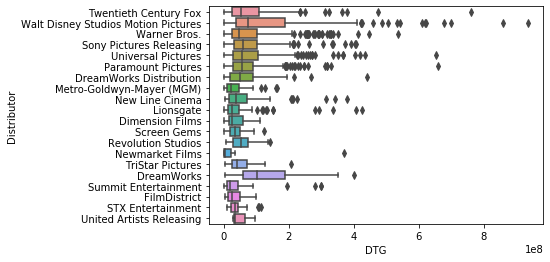

In [82]:
#plot distributors vs DTG
import seaborn as sns
sns.boxplot('DTG', 'Distributor', data=top10)

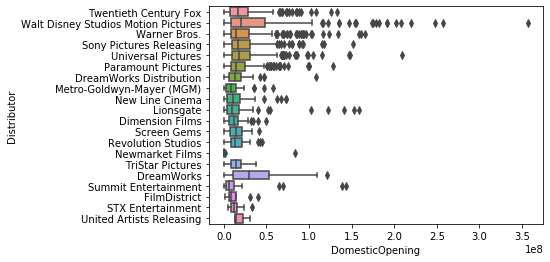

In [83]:
sns.boxplot('DomesticOpening', 'Distributor', data=top10)

In [557]:
#Plot movie rating vs DTG
rating_sem = df3.groupby("Rating")["DTG"].sem().reset_index().sort_values("DTG", ascending = False)
error = rating_sem["DTG"]

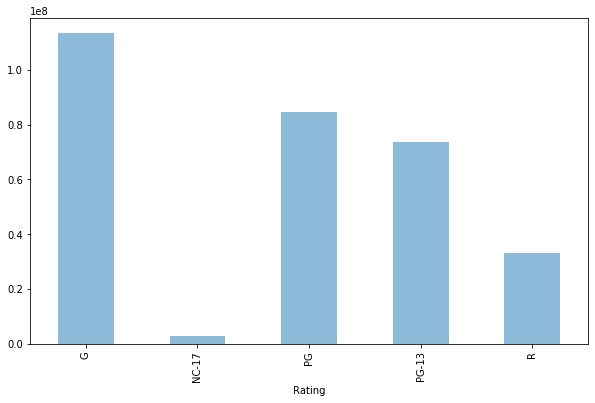

In [558]:
(df3.set_index("Rating")
.groupby("Rating")["DTG"]
.mean()
.plot.bar(yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10))

In [83]:
#top 10 Genre
top10_Genre = (df3.groupby(["Genre"])["DTG"].mean()
                      .reset_index()
                      .sort_values(["DTG"], ascending = False )).Genre[:10]
top10_Genre

8        Family
12      Musical
1     Adventure
0        Action
2     Animation
13      Mystery
14      Romance
9       Fantasy
10       Horror
4        Comedy
Name: Genre, dtype: object

In [88]:
top10Genre = \
    df3[df3['Genre'].isin(top10_Genre)]
top10Genre

,Title,Runtime,ReleaseDate,DTG,Rating,Genre,Distributor,DomesticOpening,Budget,Month,Year
0,Star Wars: Episode I - The Phantom Menace,136.0,1999-05-19,474544677,PG,Action,Twentieth Century Fox,64820970.0,115000000.0,May,1999
3,The Matrix,136.0,1999-03-31,171479930,R,Action,Warner Bros.,27788331.0,65000000.0,March,1999
4,Big Daddy,93.0,1999-06-25,163479795,PG-13,Comedy,Sony Pictures Releasing,41536370.0,30000000.0,June,1999
5,The Mummy,124.0,1999-05-07,155385488,PG-13,Action,Universal Pictures,43369635.0,195000000.0,May,1999
7,Runaway Bride,116.0,1999-07-30,152257509,PG,Comedy,Paramount Pictures,35055556.0,70000000.0,July,1999
8,Notting Hill,124.0,1999-05-28,116089678,PG-13,Comedy,Universal Pictures,21811180.0,42000000.0,May,1999
9,Wild Wild West,106.0,1999-06-30,113804681,PG-13,Action,Warner Bros.,27687484.0,175000000.0,June,1999
11,American Pie,95.0,1999-07-09,102561004,R,Comedy,Universal Pictures,18709680.0,12000000.0,July,1999
12,Inspector Gadget,78.0,1999-07-23,97403112,PG,Action,Walt Disney Studios Motion Pictures,21889138.0,75000000.0,July,1999
13,The Haunting,113.0,1999-07-23,91411151,PG-13,Fantasy,DreamWorks Distribution,33435140.0,80000000.0,July,1999


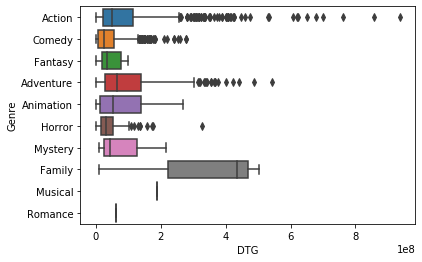

In [89]:
#plot Genre vs DTG
import seaborn as sns
sns.boxplot('DTG', 'Genre', data=top10Genre)

In [90]:
Genre_dummy = pd.get_dummies(df3['Genre'])
Genre_dummy.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Thriller
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [91]:
Rating_dummy = pd.get_dummies(df3['Rating'])
Rating_dummy.head()

,G,NC-17,PG,PG-13,R
0,0,0,1,0,0
1,0,0,0,1,0
3,0,0,0,0,1
4,0,0,0,1,0
5,0,0,0,1,0


In [92]:
Distributor_dummy = pd.get_dummies(df3['Distributor'])
print(Distributor_dummy.shape)
Distributor_dummy.head()

(3211, 178)


,8x Entertainment,A24,ATO Pictures,Abramorama,Access Entertainment,Affirm Films,Alchemy,Aloha Releasing,Amazon Studios,Anchor Bay Films,...,Vivendi Entertainment,Walt Disney Studios Motion Pictures,Warner Bros.,Warner Independent Pictures (WIP),Wingate Distribution,Wrekin Hill Entertainment,Xenon Pictures,Yari Film Group Releasing,Zeitgeist Films,eOne Entertainment
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
#Concat dummy variables into a single data frame
df_model = pd.concat([df3,Genre_dummy, Distributor_dummy,Rating_dummy], axis = 1)
df_model[:10]

,Title,Runtime,ReleaseDate,DTG,Rating,Genre,Distributor,DomesticOpening,Budget,Month,...,Wrekin Hill Entertainment,Xenon Pictures,Yari Film Group Releasing,Zeitgeist Films,eOne Entertainment,G,NC-17,PG,PG-13,R
0,Star Wars: Episode I - The Phantom Menace,136.0,1999-05-19,474544677,PG,Action,Twentieth Century Fox,64820970.0,115000000.0,May,...,0,0,0,0,0,0,0,1,0,0
1,The Sixth Sense,107.0,1999-08-06,293506292,PG-13,Drama,Walt Disney Studios Motion Pictures,26681262.0,40000000.0,August,...,0,0,0,0,0,0,0,0,1,0
3,The Matrix,136.0,1999-03-31,171479930,R,Action,Warner Bros.,27788331.0,65000000.0,March,...,0,0,0,0,0,0,0,0,0,1
4,Big Daddy,93.0,1999-06-25,163479795,PG-13,Comedy,Sony Pictures Releasing,41536370.0,30000000.0,June,...,0,0,0,0,0,0,0,0,1,0
5,The Mummy,124.0,1999-05-07,155385488,PG-13,Action,Universal Pictures,43369635.0,195000000.0,May,...,0,0,0,0,0,0,0,0,1,0
7,Runaway Bride,116.0,1999-07-30,152257509,PG,Comedy,Paramount Pictures,35055556.0,70000000.0,July,...,0,0,0,0,0,0,0,1,0,0
8,Notting Hill,124.0,1999-05-28,116089678,PG-13,Comedy,Universal Pictures,21811180.0,42000000.0,May,...,0,0,0,0,0,0,0,0,1,0
9,Wild Wild West,106.0,1999-06-30,113804681,PG-13,Action,Warner Bros.,27687484.0,175000000.0,June,...,0,0,0,0,0,0,0,0,1,0
10,Double Jeopardy,105.0,1999-09-24,116741558,R,Crime,Paramount Pictures,23162542.0,40000000.0,September,...,0,0,0,0,0,0,0,0,0,1
11,American Pie,95.0,1999-07-09,102561004,R,Comedy,Universal Pictures,18709680.0,12000000.0,July,...,0,0,0,0,0,0,0,0,0,1


In [94]:
df_model = df_model.drop(["Title", "Rating", "Distributor", "Genre", "ReleaseDate", "Year"], axis = 1)
df_model[:5]

,Runtime,DTG,DomesticOpening,Budget,Month,Action,Adventure,Animation,Biography,Comedy,...,Wrekin Hill Entertainment,Xenon Pictures,Yari Film Group Releasing,Zeitgeist Films,eOne Entertainment,G,NC-17,PG,PG-13,R
0,136.0,474544677,64820970.0,115000000.0,May,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,107.0,293506292,26681262.0,40000000.0,August,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,136.0,171479930,27788331.0,65000000.0,March,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,93.0,163479795,41536370.0,30000000.0,June,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
5,124.0,155385488,43369635.0,195000000.0,May,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [24]:
df3.describe()

,Runtime,DTG,DomesticOpening,Budget,Year
count,3235.000000,3.235000e+03,3.235000e+03,3.235000e+03,3235.000000
mean,108.473570,5.784223e+07,1.661226e+07,4.507544e+07,2008.791345
std,17.784184,8.165938e+07,2.507785e+07,4.865408e+07,5.932317
min,68.000000,1.100000e+03,1.620000e+02,1.100000e+06,1978.000000
25%,96.000000,9.538496e+06,1.027982e+06,1.300000e+07,2004.000000
50%,105.000000,3.184130e+07,9.527848e+06,2.900000e+07,2009.000000
75%,118.000000,7.030658e+07,2.056558e+07,6.000000e+07,2014.000000
max,219.000000,9.366622e+08,3.571150e+08,4.000000e+08,2019.000000


In [95]:
df_model.describe()

,Runtime,DTG,DomesticOpening,Budget,Action,Adventure,Animation,Biography,Comedy,Crime,...,Wrekin Hill Entertainment,Xenon Pictures,Yari Film Group Releasing,Zeitgeist Films,eOne Entertainment,G,NC-17,PG,PG-13,R
count,3211.000000,3.211000e+03,3.211000e+03,3.211000e+03,3211.000000,3211.000000,3211.000000,3211.000000,3211.000000,3211.000000,...,3211.000000,3211.000000,3211.000000,3211.000000,3211.000000,3211.000000,3211.000000,3211.000000,3211.000000,3211.000000
mean,108.464341,5.794199e+07,1.662484e+07,4.519222e+07,0.269698,0.092183,0.008720,0.068203,0.263781,0.057926,...,0.000311,0.000311,0.001557,0.000311,0.000311,0.007474,0.001869,0.153223,0.404235,0.433198
std,17.806389,8.183772e+07,2.512333e+07,4.874274e+07,0.443872,0.289329,0.092988,0.252133,0.440750,0.233640,...,0.017647,0.017647,0.039436,0.017647,0.017647,0.086144,0.043193,0.360259,0.490820,0.495595
min,68.000000,1.100000e+03,1.620000e+02,1.100000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,96.000000,9.589908e+06,1.010886e+06,1.300000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,105.000000,3.194575e+07,9.532425e+06,2.900000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,118.000000,7.042265e+07,2.056558e+07,6.000000e+07,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,219.000000,9.366622e+08,3.571150e+08,4.000000e+08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Linear regression analysis Sklearn

In [26]:
#pickled all linke into a file
import pickle
with open('Mov_df_model.pickle', 'wb') as file:
    pickle.dump(df_model, file)

In [5]:
import pickle
with open('Mov_df_model.pickle','rb') as read_file:
    df_model = pickle.load(read_file)

EOFError: Ran out of input

In [98]:
df_model.columns

Index(['Runtime', 'DTG', 'DomesticOpening', 'Budget', 'Month', 'Action',
       'Adventure', 'Animation', 'Biography', 'Comedy',
       ...
       'Wrekin Hill Entertainment', 'Xenon Pictures',
       'Yari Film Group Releasing', 'Zeitgeist Films', 'eOne Entertainment',
       'G', 'NC-17', 'PG', 'PG-13', 'R'],
      dtype='object', length=205)

In [99]:
col_list = list(df_model.columns)
col_list 

['Runtime',
 'DTG',
 'DomesticOpening',
 'Budget',
 'Month',
 'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 '8x Entertainment',
 'A24',
 'ATO Pictures',
 'Abramorama',
 'Access Entertainment',
 'Affirm Films',
 'Alchemy',
 'Aloha Releasing',
 'Amazon Studios',
 'Anchor Bay Films',
 'Annapurna Pictures',
 'Apparition',
 'Artisan Entertainment',
 'Artistic License',
 'Atlas Distribution Company',
 'Aviron Pictures',
 'B.D. Fox Independent',
 'BH Tilt',
 'Big Fat Movies',
 'Bleecker Street Media',
 'Briarcliff Entertainment',
 'Broad Green Pictures',
 'Bubble Distribution',
 'CBS Films',
 'Chicago Pictures',
 'Cinelou Films',
 'City Lights Pictures',
 'Clarius Entertainment',
 'Cohen Media Group',
 'Columbia Pictures',
 'Cowboy Pictures',
 'Cyan Pictures',
 'Darius Films',
 'Destination Films',
 'Dimension Films',
 'Drafthouse Films'

In [100]:
new_col_list = ['DTG','Runtime',
 'Budget',
 'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 '8x Entertainment',
 'A24',
 'ATO Pictures',
 'Abramorama',
 'Access Entertainment',
 'Affirm Films',
 'Alchemy',
 'Aloha Releasing',
 'Amazon Studios',
 'Anchor Bay Films',
 'Annapurna Pictures',
 'Apparition',
 'Artisan Entertainment',
 'Artistic License',
 'Atlas Distribution Company',
 'Aviron Pictures',
 'B.D. Fox Independent',
 'BH Tilt',
 'Big Fat Movies',
 'Bleecker Street Media',
 'Briarcliff Entertainment',
 'Broad Green Pictures',
 'Bubble Distribution',
 'CBS Films',
 'Chicago Pictures',
 'Cinelou Films',
 'City Lights Pictures',
 'Clarius Entertainment',
 'Cohen Media Group',
 'Columbia Pictures',
 'Cowboy Pictures',
 'Cyan Pictures',
 'Darius Films',
 'Destination Films',
 'Dimension Films',
 'Drafthouse Films',
 'DreamWorks',
 'DreamWorks Distribution',
 'EchoLight Studios',
 'Electric Entertainment',
 'Entertainment One',
 'Entertainment Studios Motion Pictures',
 'EuropaCorp',
 'Excel Entertainment',
 'Exclusive Media',
 'FUNimation Entertainment',
 'FilmDistrict',
 'Fine Line Features',
 'First Independent Pictures',
 'First Look International',
 'Focus Features',
 'Focus World',
 'Fox Atomic',
 'Fox Searchlight Pictures',
 'Freestyle Releasing',
 'Fun Academy Motion Pictures',
 'GVN Releasing',
 'Global Road Entertainment',
 'Gold Circle',
 'Gramercy Pictures (I)',
 'Gunpowder & Sky',
 'Hammond Entertainment, LLC',
 'Hannover House',
 "Hombre d'Oro",
 'Hummingbird Pictures',
 'IDP Distribution',
 'IFC Films',
 'IM Global/Blumhouse',
 'Image Entertainment',
 'ImaginAsian Pictures',
 'Indican Pictures',
 'IndieVest Pictures',
 'Industrial House Films',
 'IndustryWorks Pictures',
 'Kino International',
 'LD Entertainment',
 'Lionsgate',
 'Lionsgate Premiere',
 'MGM/Weinstein',
 'Magnolia Pictures',
 'Maya Entertainment',
 'Methinx Entertainment',
 'Metro-Goldwyn-Mayer (MGM)',
 'Millennium Entertainment',
 'Millennium Films, Inc.',
 'Miramax',
 'Mitropoulos Films',
 'Monterey Media',
 'Music Box Films',
 'National Geographic Entertainment',
 'Neon',
 'Neverland Films',
 'New Films Cinema',
 'New Line Cinema',
 'Newmarket Films',
 'Next Millenium Films',
 'OTL Releasing',
 'October Films',
 'Odeon',
 'Omni Lab/Freestyle Releasing',
 'Open Road Films (II)',
 'Orion Pictures',
 'Oscilloscope',
 'Overture Films',
 'Paladin',
 'Pantelion Films',
 'Paramount Classics',
 'Paramount Insurge',
 'Paramount Pictures',
 'Paramount Vantage',
 'Phaedra Cinema',
 'Phase 4 Films',
 'Picturehouse',
 'Picturehouse (II)',
 'Pinnacle Peak',
 'PolyGram',
 'Priority Films',
 'Pro-Motion Pictures',
 'Providence Entertainment',
 'Purdie Distribution',
 'Pure Flix Entertainment',
 'Quaker Media',
 'Quality Flix',
 'RADiUS-TWC',
 'RCR Distribution',
 'RKO Radio Pictures',
 'Red Flag Releasing',
 'Relativity Media',
 'Revolution Studios',
 'Roadside Attractions',
 'Rocky Mountain Pictures',
 'Rogue Pictures',
 'SModcast Pictures',
 'STX Entertainment',
 'Screen Gems',
 'Screen Media Films',
 'Seatzy/Integrated Media Association',
 'Seville',
 'Silver Nitrate',
 'Slamdance on the Road',
 'Slowhand Cinema Releasing',
 'Slugger Pictures',
 'Sony Pictures Classics',
 'Sony Pictures Releasing',
 'Strand Releasing',
 'Studio 8',
 'Submarine Deluxe',
 'Summit Entertainment',
 'THINKFilm',
 'TLA Releasing',
 'Ten Furlongs',
 'The Bigger Picture',
 'The Film Arcade',
 'The Orchard',
 'The Samuel Goldwyn Company',
 'The Weinstein Company',
 'Third Rail Releasing',
 'TriStar Pictures',
 'Triumph Releasing Corporation',
 'Twentieth Century Fox',
 'USA Films',
 'United Artists',
 'United Artists Releasing',
 'Universal Pictures',
 'Variance Films',
 'Vertical Entertainment',
 'Vineyard Distribution',
 'Viva Pictures Distribution',
 'Vivendi Entertainment',
 'Walt Disney Studios Motion Pictures',
 'Warner Bros.',
 'Warner Independent Pictures (WIP)',
 'Wingate Distribution',
 'Wrekin Hill Entertainment',
 'Xenon Pictures',
 'Yari Film Group Releasing',
 'Zeitgeist Films',
 'eOne Entertainment',
 'G',
 'NC-17',
 'PG',
 'PG-13',
 'R']

In [101]:
df1_model = pd.DataFrame(df_model, columns = new_col_list)

### Feature transformation

In [234]:
#log tranform of dependent variable
df1_modelBudget_log = np.log(df1_model.Budget)
df1_modelBudget_log.describe()

count    3211.000000
mean       17.073593
std         1.140163
min        13.910821
25%        16.380460
50%        17.182806
75%        17.909855
max        19.806975
Name: Budget, dtype: float64

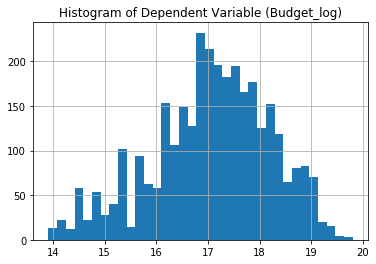

In [235]:
#log tranform of dependent variable
df1_modelBudget_log.hist(bins=35)
plt.title('Histogram of Dependent Variable (Budget_log)');

### Split data train test and run model

In [97]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge
from sklearn.model_selection import train_test_split

In [237]:
df1_model["Budget_log"] = df1_modelBudget_log

,DTG,Runtime,DomesticOpening,Budget,Month,Action,Adventure,Animation,Biography,Comedy,...,Xenon Pictures,Yari Film Group Releasing,Zeitgeist Films,eOne Entertainment,G,NC-17,PG,PG-13,R,Budget_log
0,474544677,136.0,64820970.0,115000000.0,5,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,18.560443
1,293506292,107.0,26681262.0,40000000.0,8,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,17.504390
3,171479930,136.0,27788331.0,65000000.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,17.989898
4,163479795,93.0,41536370.0,30000000.0,6,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,17.216708
5,155385488,124.0,43369635.0,195000000.0,5,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,19.088510


In [333]:
df1_model.sort_values("DTG", ascending = False)

,DTG,Runtime,DomesticOpening,Budget,Month,Action,Adventure,Animation,Biography,Comedy,...,Xenon Pictures,Yari Film Group Releasing,Zeitgeist Films,eOne Entertainment,G,NC-17,PG,PG-13,R,Budget_log
3488,936662225,138.0,247966675.0,245000000.0,12,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,19.316769
4321,858373000,181.0,357115007.0,400000000.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,19.806975
2079,760507625,162.0,77025481.0,237000000.0,12,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,19.283571
4123,700059566,134.0,202003951.0,200000000.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,19.113828
4124,678815482,149.0,257698183.0,300000000.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,19.519293
2881,659363944,194.0,28638131.0,200000000.0,12,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,19.113828
3487,652270625,124.0,208806270.0,215000000.0,6,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,19.186149
2829,623357910,143.0,207438708.0,225000000.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,19.231611
3922,620181382,152.0,220009584.0,317000000.0,12,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,19.574412
4125,608581744,118.0,182687905.0,200000000.0,6,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,19.113828


In [318]:
df2_model = df1_model.drop(["DomesticOpening", "Budget_log"], axis = 1)

In [247]:
#Taking all data together
X = df2_model.iloc[:, 1:]
y = df2_model.iloc[:, 0]
print(X.shape, y.shape)

(3211, 203) (3211,)


In [248]:
X[:5]

,Runtime,Budget,Month,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,Wrekin Hill Entertainment,Xenon Pictures,Yari Film Group Releasing,Zeitgeist Films,eOne Entertainment,G,NC-17,PG,PG-13,R
0,136.0,115000000.0,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,107.0,40000000.0,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,136.0,65000000.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,93.0,30000000.0,6,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
5,124.0,195000000.0,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [249]:
#Using statmodel to verify the assumptions of linear regression
import statsmodels.api as sm
X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DTG   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     15.81
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        22:13:58   Log-Likelihood:                -61908.
No. Observations:                3211   AIC:                         1.242e+05
Df Residuals:                    3010   BIC:                         1.254e+05
Df Model:                         200                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                  -2.38e+07      1e+07     -2.378      0.017   -4.34e+07   -4.18e+06
Runtime                                5.389e+05   7.42e+04      7.263      0.000    3.93e+05    6.84e+05
Budget                                    0.9901      0.031     31.493      0.000       0.928       1.052
Month                                  -4.22e+05   3.23e+05     -1.306      0.192   -1.06e+06    2.11e+05
Action                                -3.108e+07   8.59e+06     -3.618      0.000   -4.79e+07   -1.42e+07
Adventure                             -1.909e+07   9.13e+06     -2.090      0.037    -3.7e+07   -1.18e+06
Animation                              3.326e+06   1.37e+07      0.242      0.809   -2.36e+07    3.02e+07
Biography                             -3.299e+07   9.18e+06     -3.593      0.000    -5.1e+07    -1.5e+07
Comedy                                -2.176e+07   8.52e+06     -2.555      0.011   -3.85e+07   -5.06e+06
Crime                                 -2.941e+07   9.42e+06     -3.123      0.002   -4.79e+07   -1.09e+07
Documentary                           -2.266e+07   1.68e+07     -1.351      0.177   -5.55e+07    1.02e+07
Drama                                 -3.203e+07   8.67e+06     -3.694      0.000    -4.9e+07    -1.5e+07
Family                                 1.934e+08   3.34e+07      5.787      0.000    1.28e+08    2.59e+08
Fantasy                               -2.211e+07   1.87e+07     -1.183      0.237   -5.87e+07    1.45e+07
Horror                                -3.077e+06   9.47e+06     -0.325      0.745   -2.17e+07    1.55e+07
Music                                  9.251e+05   7.92e+07      0.012      0.991   -1.54e+08    1.56e+08
Musical                                1.406e+08   5.64e+07      2.493      0.013       3e+07    2.51e+08
Mystery                               -2.141e+07   1.97e+07     -1.084      0.278   -6.01e+07    1.73e+07
Romance                               -3.795e+07   5.63e+07     -0.674      0.501   -1.48e+08    7.25e+07
Sci-Fi                                -5.097e+07   3.34e+07     -1.526      0.127   -1.16e+08    1.45e+07
Thriller                              -3.743e+07   6.15e+07     -0.608      0.543   -1.58e+08    8.32e+07
8x Entertainment                      -1.105e+07   4.17e+07     -0.265      0.791   -9.29e+07    7.08e+07
A24                                    9.754e+06   1.23e+07      0.794      0.427   -1.43e+07    3.38e+07
ATO Pictures                           2.726e+06    5.9e+07      0.046      0.963   -1.13e+08    1.18e+08
Abramorama                            -2.096e+06    5.9e+07     -0.036      0.972   -1.18e+08    1.14e+08
Access Entertainment                   1.272e+07    5.9e+07      0.216      0.829   -1.03e+08    1.28e+08
Affirm Fi

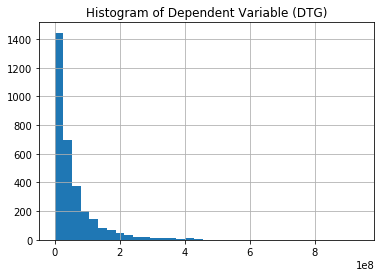

In [250]:
# inspect histogram of dependent variable 
df1_model.DTG.hist(bins=35)
plt.title('Histogram of Dependent Variable (DTG)');

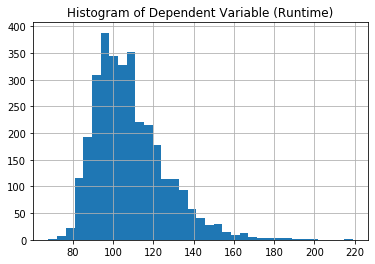

In [251]:
# inspect histogram of independent variable runtime
df1_model.Runtime.hist(bins=35)
plt.title('Histogram of Dependent Variable (Runtime)');

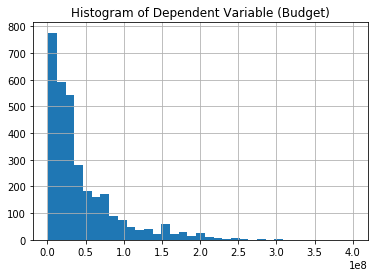

In [252]:
# inspect histogram of independent variable Budget
df1_model.Budget.hist(bins=35)
plt.title('Histogram of Dependent Variable (Budget)');

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)
m = LinearRegression()
m.fit(X_train,y_train)
m.score(X_train,y_train), m.score(X_test,y_test)

(0.5137210206610041, 0.48972513521612693)

In [254]:
coeff = pd.DataFrame(zip(X_train.columns, m.coef_), 
                     columns = ("name", "co_eff")).sort_values("co_eff", ascending = False)
coeff

,name,co_eff
11,Family,2.015734e+08
114,Newmarket Films,4.260138e+07
177,TriStar Pictures,3.587802e+07
189,Walt Disney Studios Motion Pictures,3.483541e+07
167,Summit Entertainment,3.212959e+07
56,DreamWorks,3.137396e+07
65,FUNimation Entertainment,2.740241e+07
182,United Artists Releasing,2.681609e+07
57,DreamWorks Distribution,2.445679e+07
86,IFC Films,2.066046e+07


In [255]:
m.intercept_

-28607507.802277096

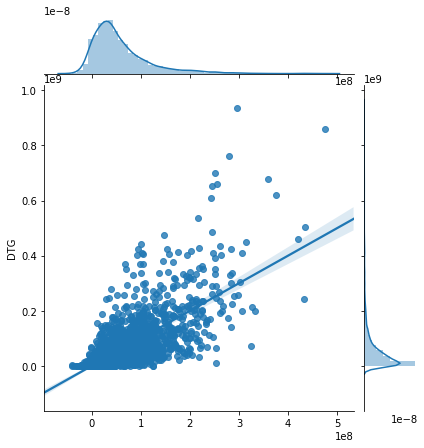

In [256]:
preds = m.predict(X_train) # generate predictions (on training data) using fit model

sns.jointplot(preds,y_train, kind='regplot')

In [260]:
lr = LinearRegression()
fit = lr.fit(X,y) # for later use

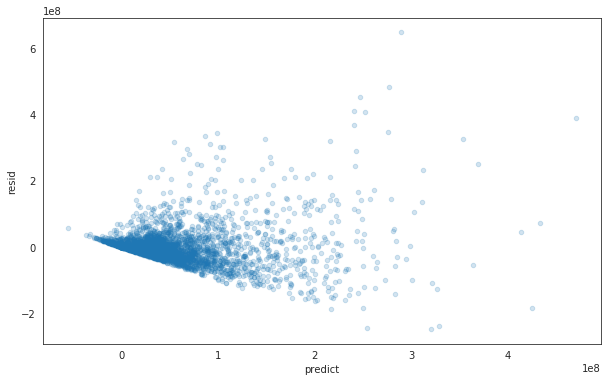

In [262]:
lr = LinearRegression()
fit = lr.fit(X,y) # for later use
df2_model['predict']=fit.predict(X)
df2_model['resid']=df2_model.DTG-df2_model.predict
with sns.axes_style('white'):
    plot=df2_model.plot(kind='scatter',
                  x='predict',y='resid',alpha=0.2,figsize=(10,6))

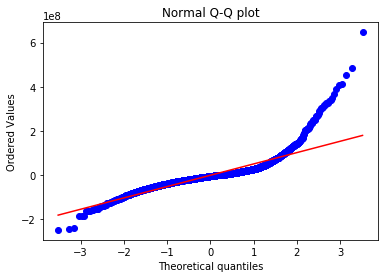

In [263]:
# diagnose/inspect residual normality using qqplot:
stats.probplot(df2_model['resid'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

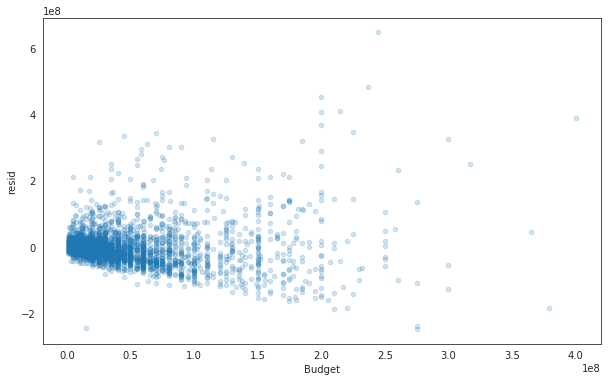

In [264]:
# Residual plot with feature
with sns.axes_style('white'):
    plot=df2_model.plot(kind='scatter',
                  x='Budget',y='resid',alpha=0.2,figsize=(10,6))

> Redidual plot suggests there is no true linear relationship between variables

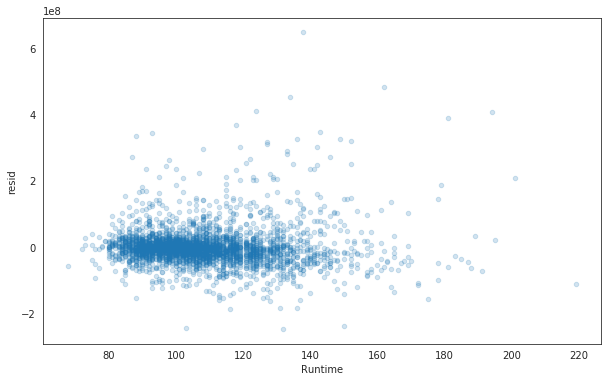

In [265]:
# residual plot with feature Runtime
with sns.axes_style('white'):
    plot=df2_model.plot(kind='scatter',
                  x='Runtime',y='resid',alpha=0.2,figsize=(10,6))

## Applying polynomials


In [280]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, LassoCV, Lasso #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [402]:
df2_model.sort_values("Budget", ascending = False)

,DTG,Runtime,Budget,Month,Action,Adventure,Animation,Biography,Comedy,Crime,...,Wrekin Hill Entertainment,Xenon Pictures,Yari Film Group Releasing,Zeitgeist Films,eOne Entertainment,G,NC-17,PG,PG-13,R
4321,858373000,181.0,400000000.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2577,241071802,136.0,379000000.0,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3489,459005868,141.0,365000000.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3922,620181382,152.0,317000000.0,12,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4124,678815482,149.0,300000000.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3497,200074609,148.0,300000000.0,10,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1626,309420425,169.0,300000000.0,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4132,213767512,135.0,275000000.0,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2866,73078100,132.0,275000000.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2830,448139099,164.0,275000000.0,7,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [404]:
X = df2_model.iloc[:, 1:]
y = df2_model.iloc[:, 0]

In [321]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

In [322]:
poly_reg = PolynomialFeatures(degree=2)
X_polytrain = poly_reg.fit_transform(X_train) #regression fit
pol_reg = LinearRegression() 
pol_reg.fit(X_polytrain, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [323]:
pol_reg.score(X_polytrain, y_train)

0.5669223880308127

In [324]:
X_polytest = poly_reg.transform(X_test)
pol_reg.score(X_polytest,y_test)

0.41618615937610404

In [325]:
pol_lasso = LassoCV()
pol_lasso.fit(X_polytrain, y_train)
pol_lasso.score(X_polytrain, y_train),pol_lasso.score(X_polytest,y_test)

(0.4319943276698748, 0.41460149127908674)

In [327]:
mx = pol_lasso.alpha_
for i in range(1,110,10):
    a = mx*i/1000000000
    pol_lasso = Lasso(alpha=a)
    pol_lasso.fit(X_polytrain, y_train)
    print(pol_lasso.score(X_polytrain, y_train),pol_lasso.score(X_polytest, y_test))

0.5437112143932435 0.4773280453743862
0.5216515981516633 0.4925802983937472
0.5156835702544093 0.48824038673294834
0.5131957894971061 0.4877267049496343
0.5105436460841044 0.486629073362989
0.5071547961649434 0.48478341304584494
0.5030292397574533 0.482189724030473
0.4981669775850618 0.4788480074107161
0.49344604551988436 0.47591788648432076
0.4907436406826595 0.4739401727443413
0.48772700271454983 0.4715482704374732


In [328]:
feat = list(zip(poly_reg.get_feature_names(input_features=X_train.columns),pol_lasso.coef_))

In [331]:
# select feartures that have positive effect 
[f for f in feat if f[1]!=0]

[('Runtime Budget', 0.007932629463692687),
 ('Budget^2', 6.378104388558692e-10),
 ('Budget Month', 0.0004809340791287487),
 ('Budget Walt Disney Studios Motion Pictures', 0.0018083797797081144)]

In [472]:
#Make separate 
df3_model = pd.DataFrame()
df3_model["DTG"] = df2.DTG
df3_model["Runtime_Budget"] = df2_model["Runtime"] * df2_model["Budget"]
df3_model["Budget_sq"] = df2_model["Budget"] * df2_model["Budget"]
df3_model["Budget_month"] = df2_model["Budget"] * df2_model["Month"]
df3_model["Distributor_Budget"] = df2_model["Budget"] * df2_model["Walt Disney Studios Motion Pictures"]

In [479]:
df3_model = df3_model.dropna()
df3_model[:5]

,DTG,Runtime_Budget,Budget_sq,Budget_month,Distributor_Budget
0,474544677,1.564000e+10,1.322500e+16,575000000.0,0.0
1,293506292,4.280000e+09,1.600000e+15,320000000.0,40000000.0
3,171479930,8.840000e+09,4.225000e+15,195000000.0,0.0
4,163479795,2.790000e+09,9.000000e+14,180000000.0,0.0
5,155385488,2.418000e+10,3.802500e+16,975000000.0,0.0


In [488]:
df3_model.shape

(3211, 7)

In [480]:
X = df3_model.iloc[:, 1:]
y = df3_model.iloc[:, 0]

In [481]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

In [482]:
m = LinearRegression()
m.fit(X_train,y_train)
m.score(X_train,y_train), m.score(X_test,y_test)

(0.5037544630622467, 0.4766724508649509)

In [483]:
coeff = pd.DataFrame(zip(X_train.columns, m.coef_), 
                     columns = ("name", "co_eff")).sort_values("co_eff", ascending = False)
coeff

,name,co_eff
3,Distributor_Budget,4.331413e-01
0,Runtime_Budget,8.866499e-03
2,Budget_month,5.064840e-03
1,Budget_sq,-7.944734e-10


In [489]:
m.intercept_

10851190.631071597

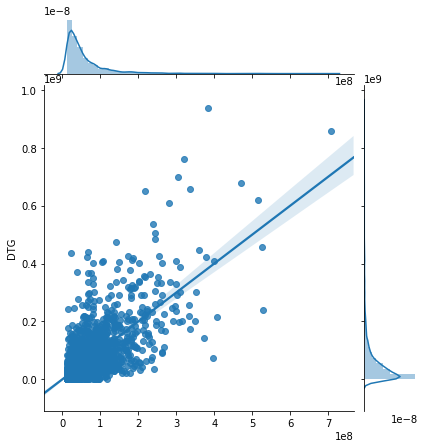

In [485]:
preds = m.predict(X_train) # generate predictions (on training data) using fit model

sns.jointplot(preds,y_train, kind='regplot')

In [490]:
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}') 
        

In [491]:
split_and_validate(X, y)


Validation R^2 score was: 0.4350182366328626
Feature coefficient results: 

Runtime_Budget : 0.01
Budget_sq : -0.00
Budget_month : 0.00
Distributor_Budget : 0.50


In [486]:
#Using statmodel to verify the assumptions of linear regression
import statsmodels.api as sm
X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DTG   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     1036.
Date:                Tue, 24 Dec 2019   Prob (F-statistic):               0.00
Time:                        00:46:36   Log-Likelihood:                -61973.
No. Observations:                3211   AIC:                         1.240e+05
Df Residuals:                    3207   BIC:                         1.240e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.534e-09   1.45e-10     10.561      0.000    1.25e-09    1.82e-09
Runtime_Budget         0.0112      0.000     25.049      0.000       0.010       0.012
Budget_sq          -2.026e-09   2.56e-10     -7.911      0.000   -2.53e-09   -1.52e-09
Budget_month           0.0041      0.005      0.865      0.387      -0.005       0.013
Distributor_Budget     0.4383      0.042     10.541      0.000       0.357       0.520
==============================================================================
Omnibus:                     1504.331   Durbin-Watson:                   1.469
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20914.307
Skew:                           1.861   Prob(JB):                         0.00
Kurtosis:                      14.936   Cond. No.                     1.80e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+16. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

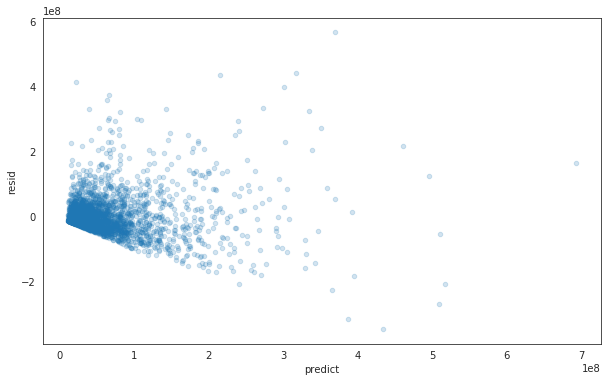

In [487]:
lr = LinearRegression()
fit = lr.fit(X,y) # for later use
df3_model['predict']=fit.predict(X)
df3_model['resid']=df3_model.DTG-df3_model.predict
with sns.axes_style('white'):
    plot=df3_model.plot(kind='scatter',
                  x='predict',y='resid',alpha=0.2,figsize=(10,6))

- Althouth introducing polynomial features model slightly improved:
1) By adding some more features like rating or cast and crew.
2) there is also slightly linear relation ship between runtime and Budget.
- these precausions might improve the model.


In [548]:
a1 = []
for i in range(1,110,10):
    a = mx*i/1000000000
    a1.append(a)

In [549]:
print(a1)

[2494079391089.6167, 27434873301985.785, 52375667212881.95, 77316461123778.12, 102257255034674.28, 127198048945570.45, 152138842856466.62, 177079636767362.78, 202020430678258.97, 226961224589155.12, 251902018500051.28]


In [551]:
mx

2.494079391089617e+21